ADVANCE MACHINE LEARNING

LAB-6

PRANSHU PARATE

202211063

BOSTON HOUSE-PRICES

In [1]:
#import the packages
import numpy as np 
import pandas as pd

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Boston_Housing (1).xlsx')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Preprocessing

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data Visualization

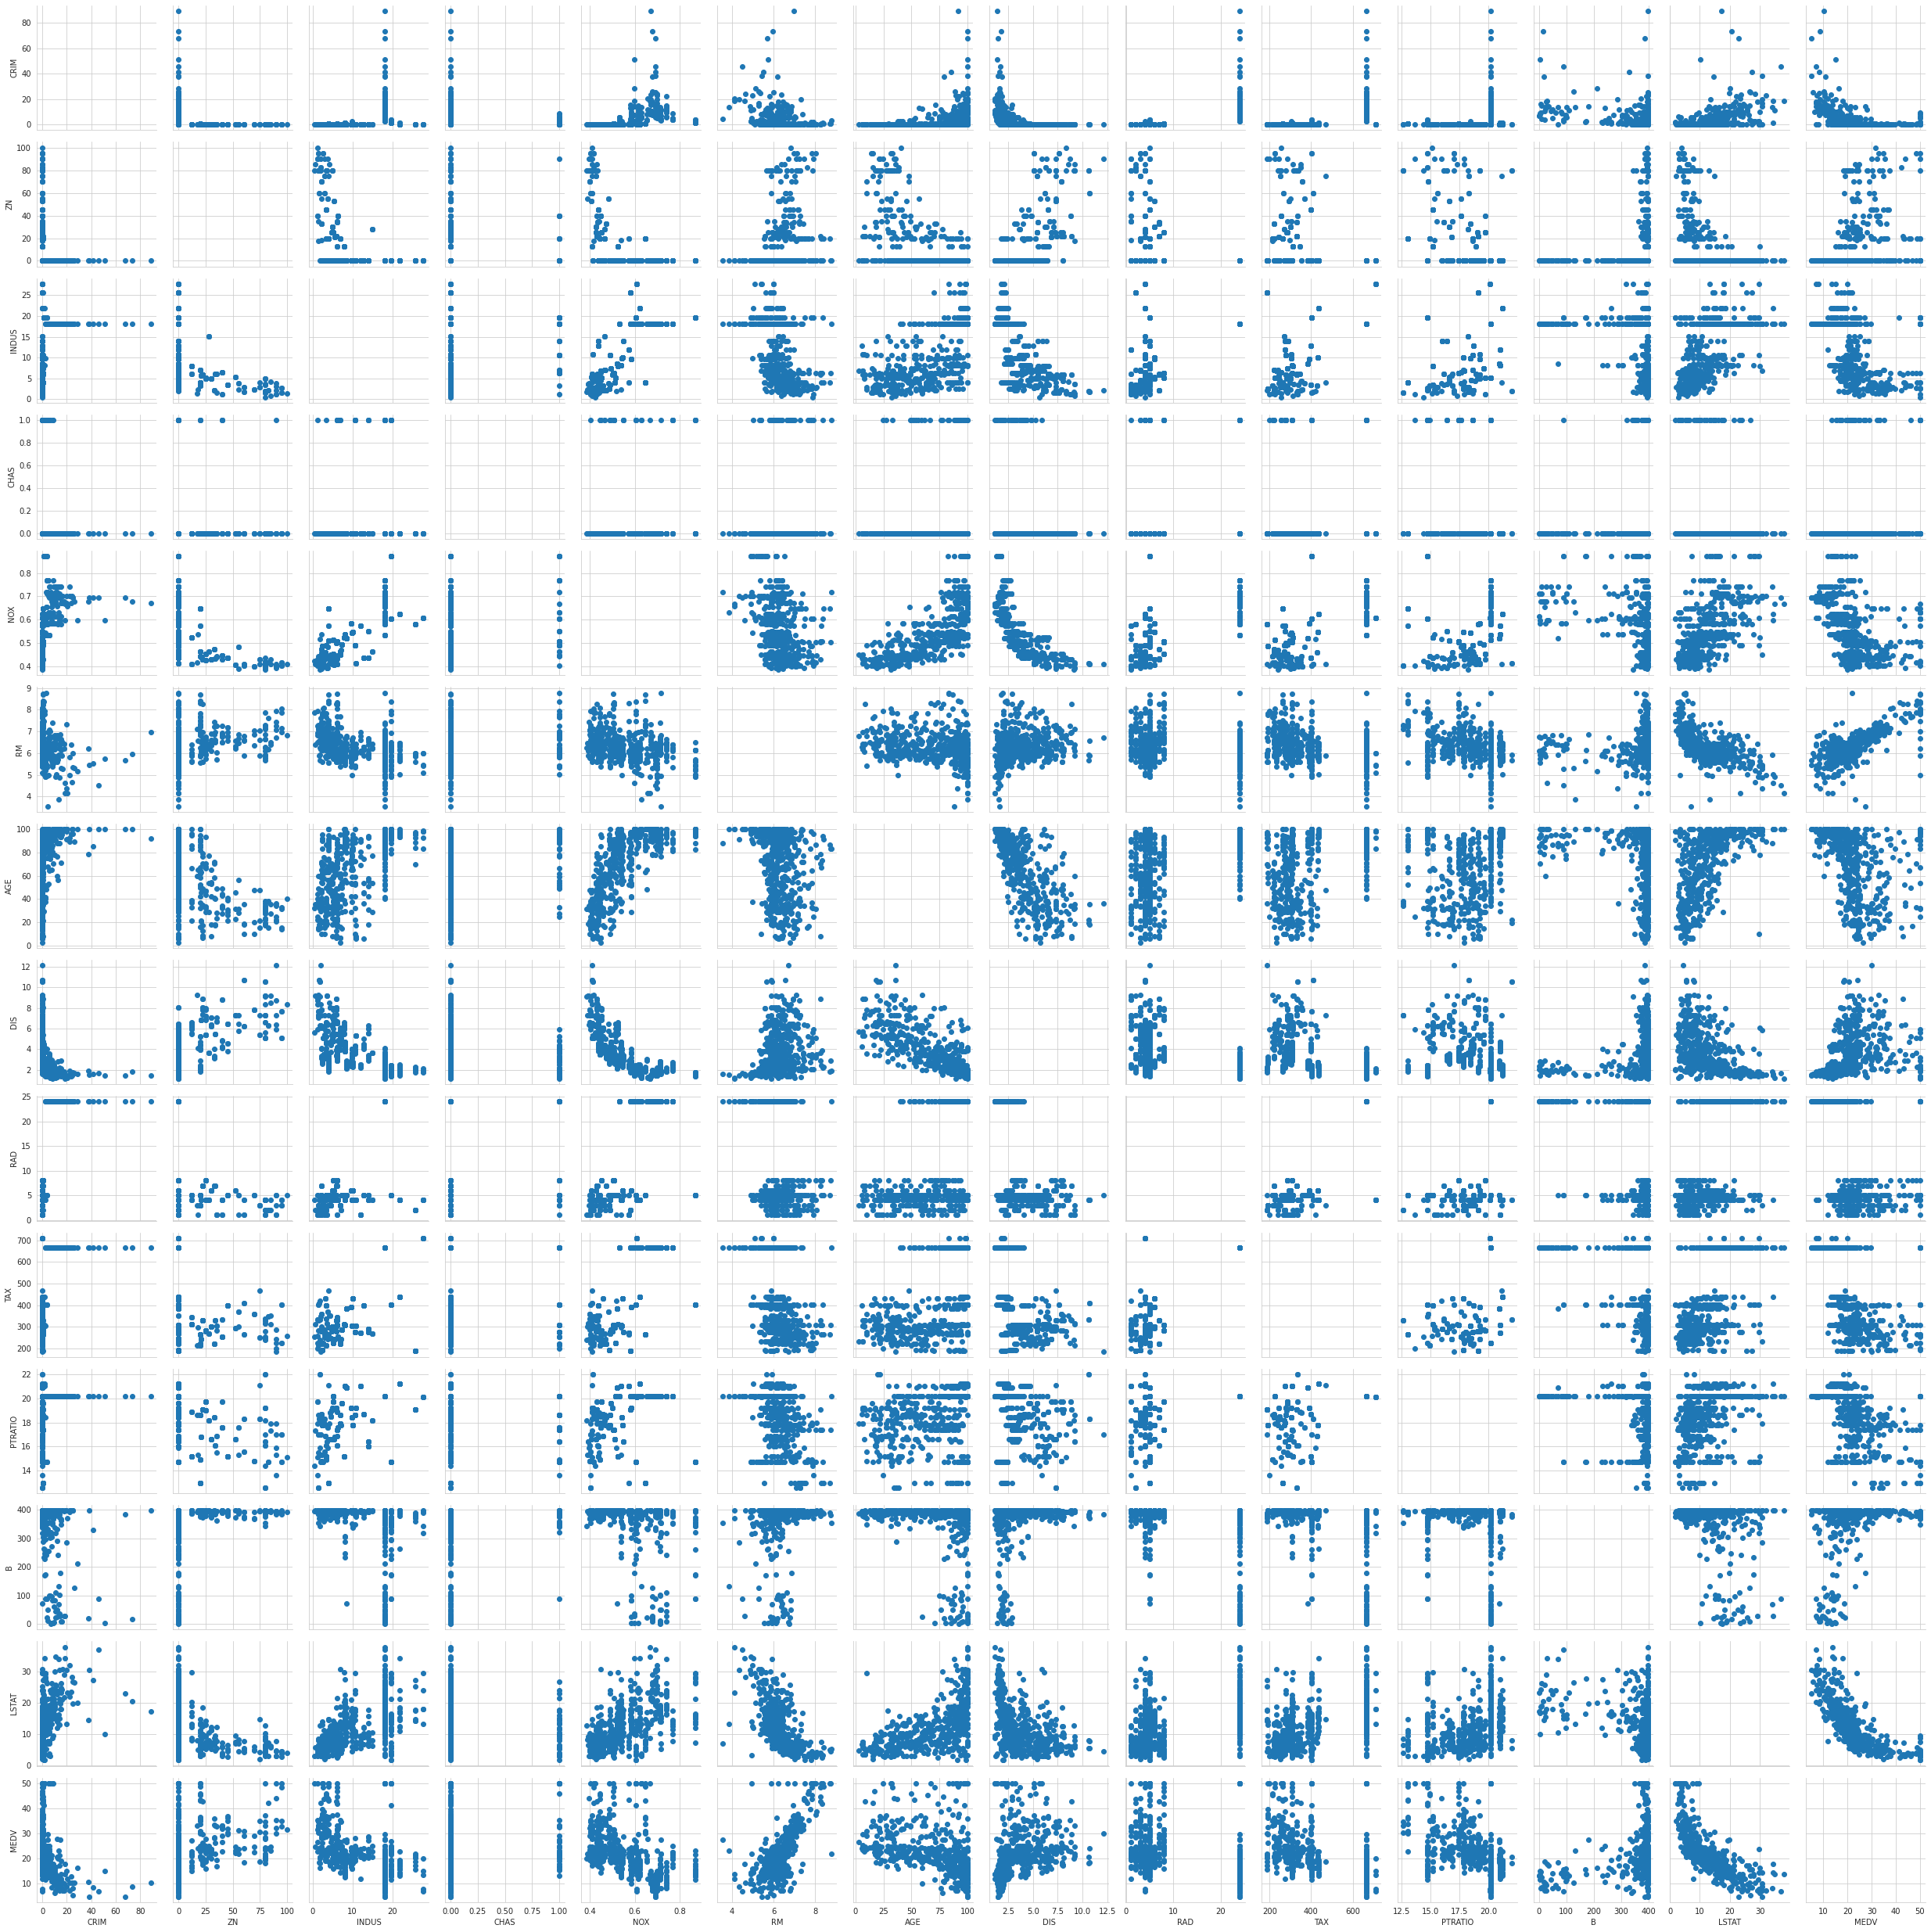

In [9]:
#scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
scatterplots=sns.PairGrid(df)
scatterplots.map_offdiag(plt.scatter) 
plt.show()

According to the plots on the last row, we can observe moderate to strong relationship between each predictor and median house price, suggesting these predictors could explain the house prices to some extent.

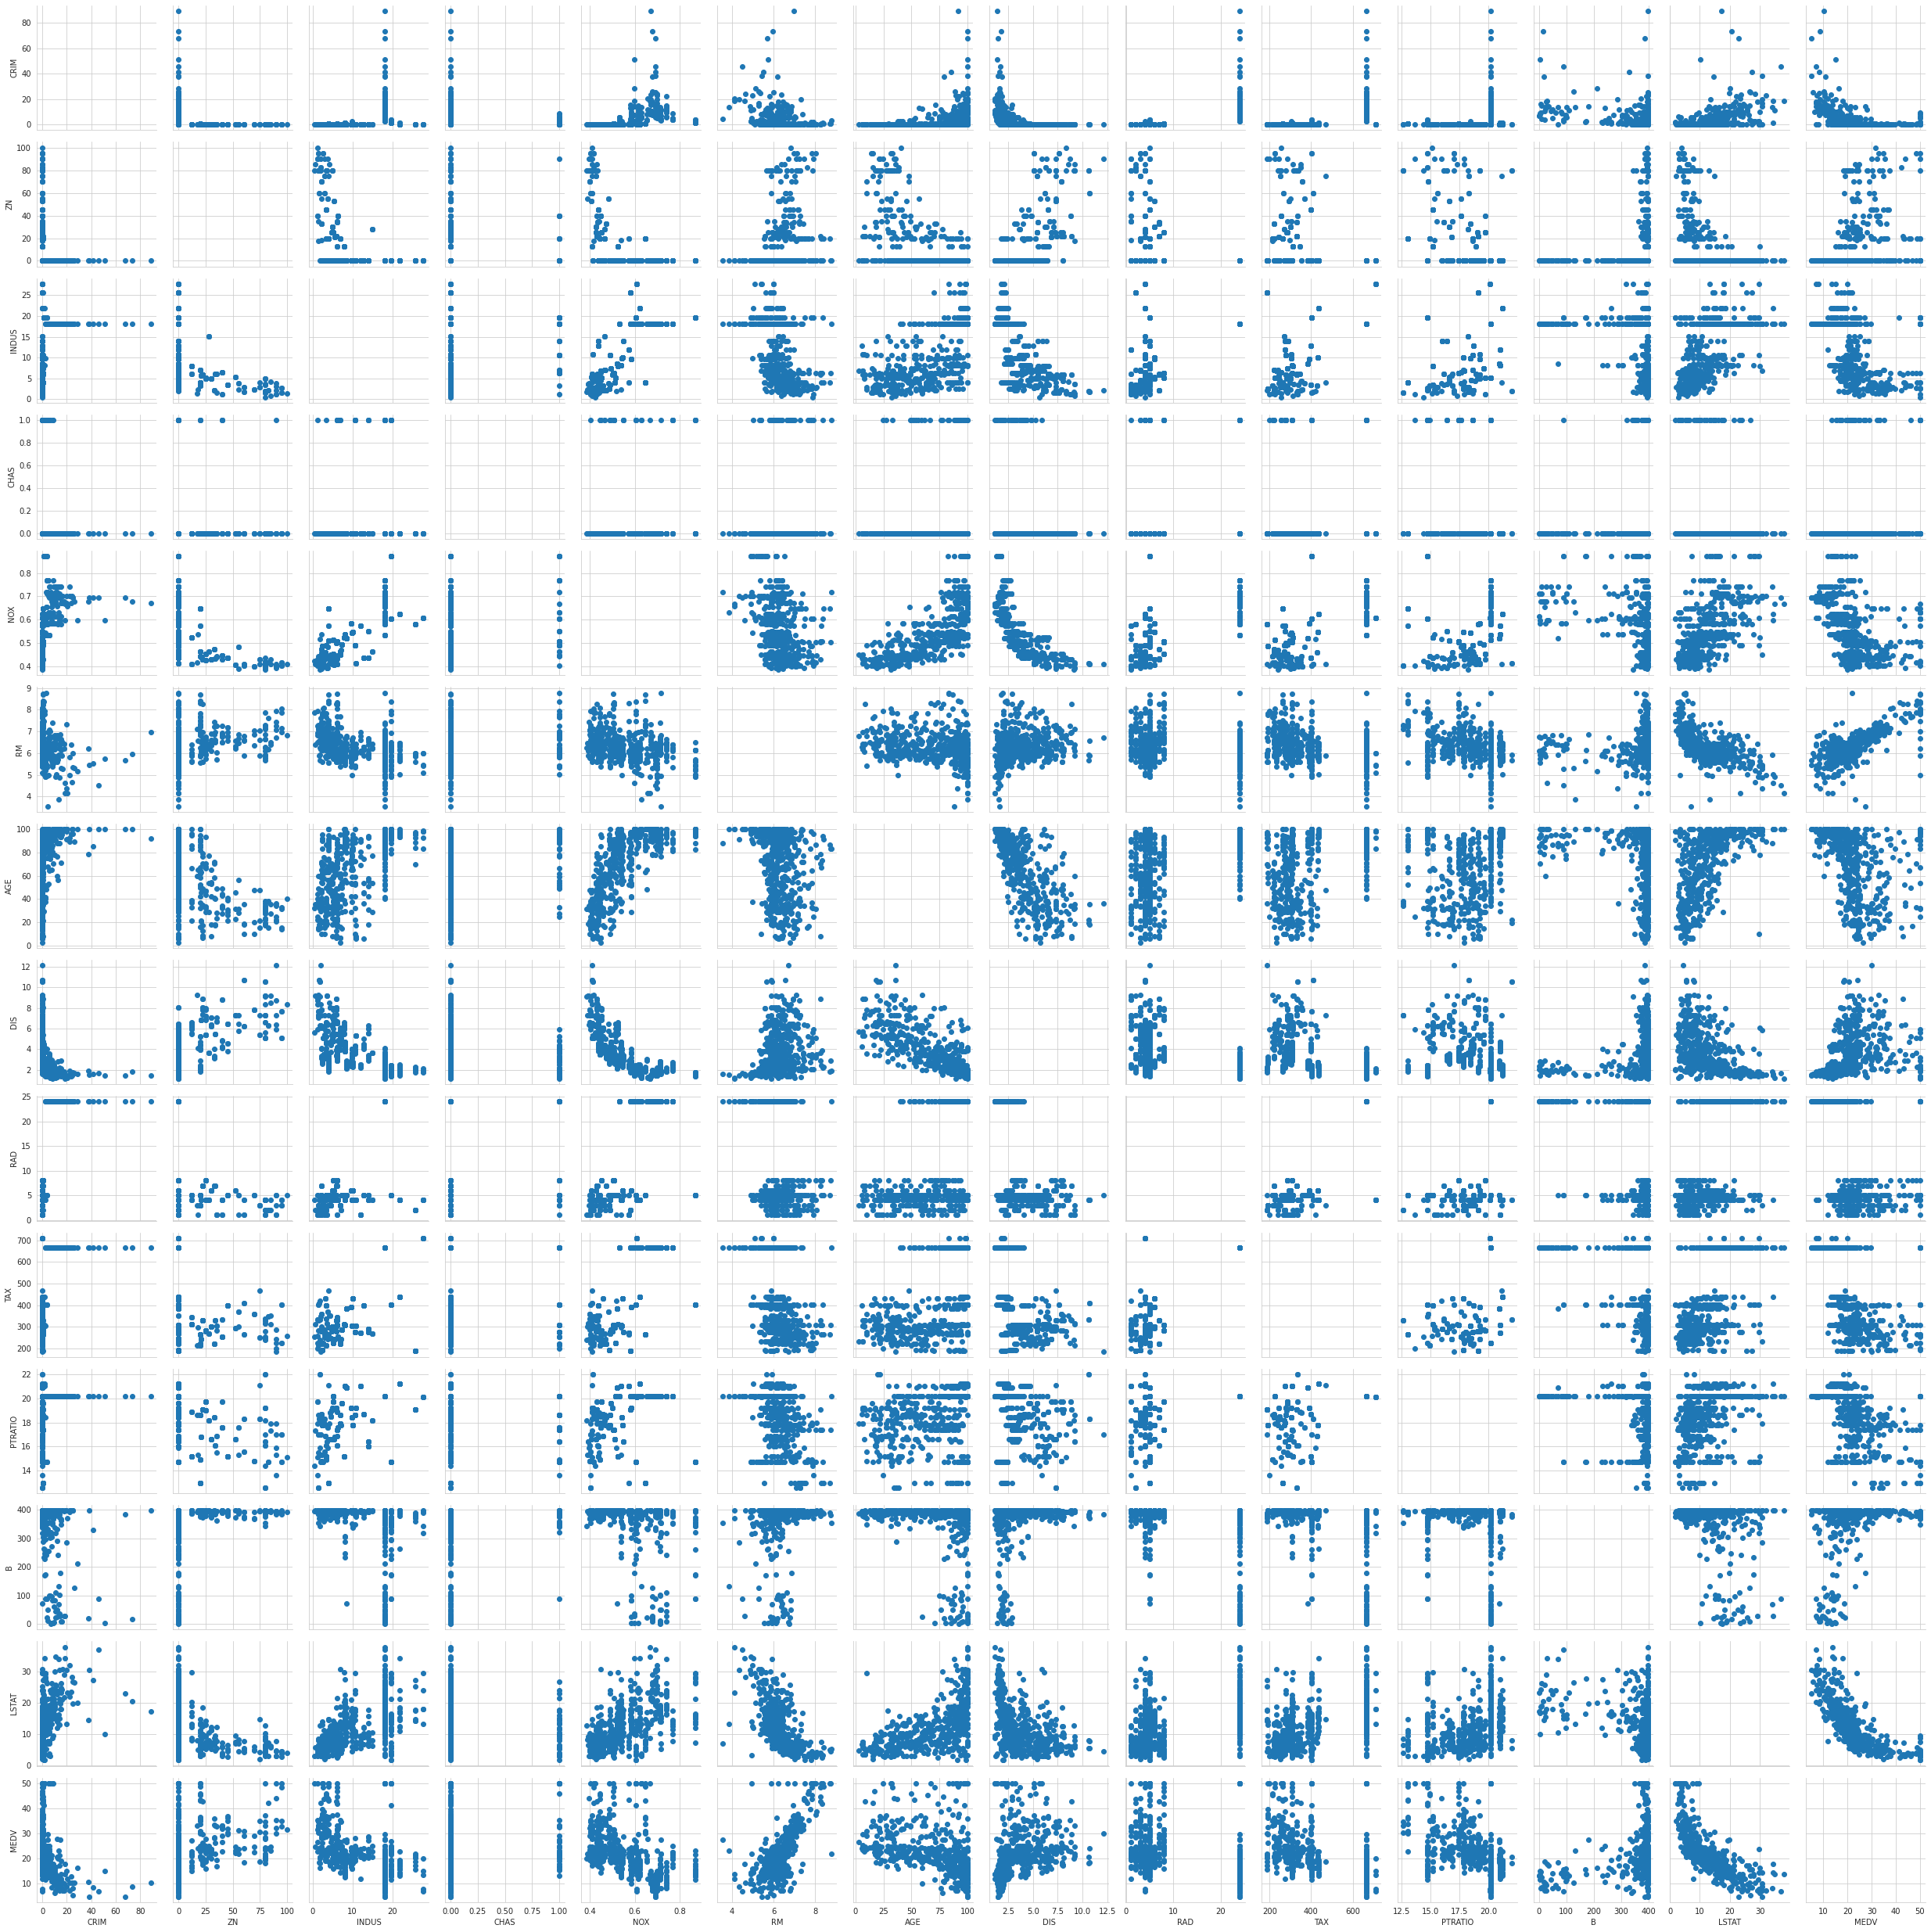

In [10]:
#scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
scatterplots=sns.PairGrid(df)
scatterplots.map_offdiag(plt.scatter) 
plt.show() 

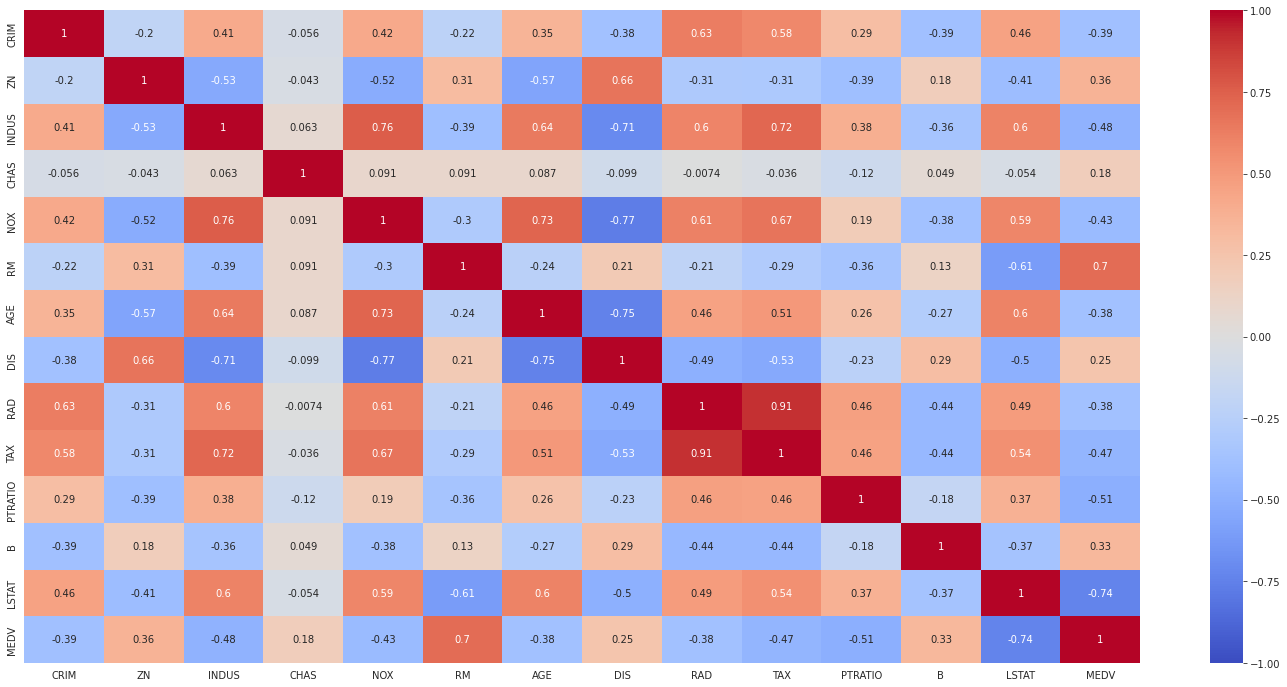

In [11]:
#correlation matrix
#df.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True)
plt.show()

In [12]:
#define the parameters
X=df.iloc[:,:12]
y=df.iloc[:,13]

In [13]:
#splitting of train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

Build Regression Model

In [14]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lr_all=LinearRegression()  
lr_all.fit(X_train, y_train) 

y_pred1=lr_all.predict(X_test)

In [15]:
lr_all.intercept_

30.85783308900529

In [16]:
#printing the coffiecients of linear regression 
lr_all_coeffcients = pd.DataFrame([X_train.columns,lr_all.coef_]).T
lr_all_coeffcients = lr_all_coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'}) 
lr_all_coeffcients 

,Attribute,Coefficients
0,CRIM,-0.166454
1,ZN,0.048704
2,INDUS,-0.003244
3,CHAS,2.832197
4,NOX,-24.381023
5,RM,5.221314
6,AGE,-0.053275
7,DIS,-1.665176
8,RAD,0.285852
9,TAX,-0.010112


In [17]:
lr_all.score(X_test, y_test)

0.7585173392839129

In [18]:
#Evaluate the model by using following metrics
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred1))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

R^2: 0.7585173392839129
Adjusted R^2: 0.7376699153372003
MAE: 3.4520040556978557
MSE: 22.13296941191109
RMSE: 4.704568993214053


Ridge Regression, Lasso Regression and Elastic Regularized Regression

In [19]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [20]:
#ridge regression
def ridge_coefs(X, y, alphas):
    coefs = []
    ridge_reg = Ridge()
    for a in alphas:
      ridge_reg.set_params(alpha=a)
      ridge_reg.fit(X, y)
      coefs.append(ridge_reg.coef_)
    return coefs

In [21]:
#lasso regression
def lasso_coefs(X, y, alphas):
    coefs = []
    Lasso_reg = Lasso()
    for a in alphas:
      Lasso_reg.set_params(alpha=a)
      Lasso_reg.fit(X, y)
      coefs.append(Lasso_reg.coef_)
    return coefs

In [22]:
#Elastic Regularized Regression
def elasticnet_coefs(X, y, alphas ,l1):
    coefs = []
    elasticnet_reg = ElasticNet()
    for a in alphas:
      elasticnet_reg.set_params(alpha = a, l1_ratio = l1)
      elasticnet_reg.fit(X, y)
      coefs.append(elasticnet_reg.coef_)
    return coefs

In [23]:
r_alphas = np.logspace(0, 5, 200)
lambdas = np.linspace(0, 1, 200)


r_coefs = ridge_coefs(X_train, y_train, r_alphas)
l_coefs = lasso_coefs(X_train, y_train, r_alphas)
e_coefs1 = elasticnet_coefs(X_train ,y_train, r_alphas, 0.2)
e_coefs2 = elasticnet_coefs(X_train ,y_train, r_alphas, 0.5)
e_coefs3 = elasticnet_coefs(X_train ,y_train, r_alphas, 0.7)
e_coefs1 = np.array(e_coefs1)
e_coefs2 = np.array(e_coefs2)
e_coefs3 = np.array(e_coefs3)

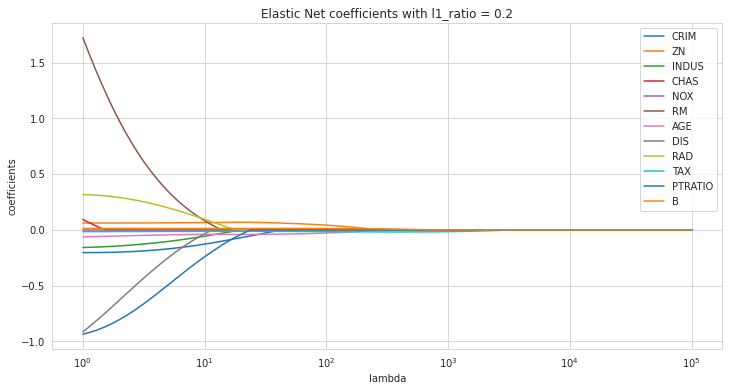

In [24]:
# Plot elastic net coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Elastic Net coefficients with l1_ratio = 0.2')
for i in range(len(X.columns)):
    plt.plot(r_alphas, e_coefs1[:, i], label=X.columns[i])
plt.legend()
plt.show()

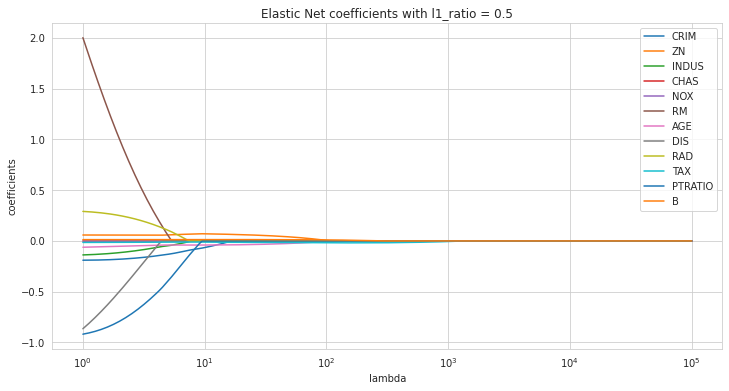

In [25]:
# Plot elastic net coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Elastic Net coefficients with l1_ratio = 0.5')
for i in range(len(X.columns)):
    plt.plot(r_alphas, e_coefs2[:, i], label=X.columns[i])
plt.legend()
plt.show()

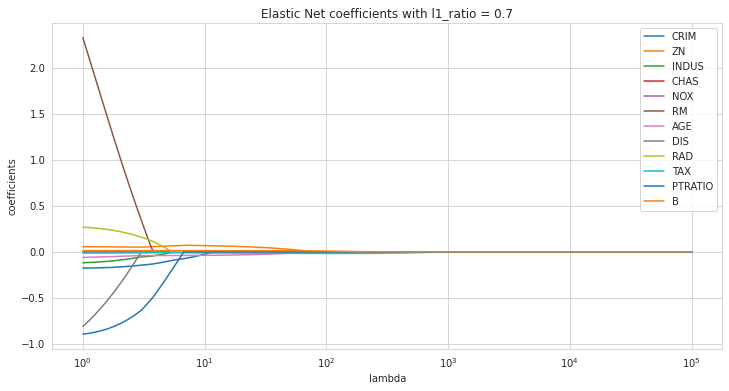

In [26]:
# Plot elastic net coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Elastic Net coefficients with l1_ratio = 0.7')
for i in range(len(X.columns)):
    plt.plot(r_alphas, e_coefs3[:, i], label=X.columns[i])
plt.legend()
plt.show()

In [28]:
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha,regtype):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    
    ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coefficients\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(list(range(1, len(feature_names)+1)), coefs[-1], align='center', color=colors)
    ax2.set_xticks(list(range(1, len(feature_names)+1)))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefficients\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha affecting coefficients', fontsize=20)
    
    plt.show()
  # this snippet is taken from an online source

In [29]:
# Plot ridge coefficients vs. lambda
from ipywidgets import *
from IPython.display import display

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.1,5,0.2))


interactive(children=(FloatSlider(value=0.1, description='log_of_alpha', max=5.0, min=0.1, step=0.2), Output()…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

In [31]:
# Plot lasso coefficients vs. lambda
from ipywidgets import *
from IPython.display import display

def lasso_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, l_coefs, X.columns, 10**log_of_alpha, regtype='lasso')

interact(lasso_plot_runner, log_of_alpha=(0.1,5,0.2))


interactive(children=(FloatSlider(value=0.1, description='log_of_alpha', max=5.0, min=0.1, step=0.2), Output()…

<function __main__.lasso_plot_runner(log_of_alpha=0)>

Diabetes dataset

In [64]:
#import the packages
from sklearn import datasets
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Load diabetes dataset
diabetes = datasets.load_diabetes()

In [66]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [67]:
# Get input and output data
X = diabetes.data
y = diabetes.target

In [68]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [69]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
#splitting pf train and test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
#Linear regression
from sklearn.metrics import r2_score
lr = LinearRegression()

# Train the model
model_lr = lr.fit(X_train1, y_train1)

# Prediction
y_pred_train_lr = lr.predict(X_train1)
y_pred_test_lr = lr.predict(X_test1)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train1, y_pred_train_lr).round(5)))
print('Testing accuracy : {}\n'.format(r2_score(y_test1, y_pred_test_lr).round(5)))

Training accuracy : 0.55393

Testing accuracy : 0.33223



In [73]:
# Normalize input data
X /= X.std(axis=0)

In [74]:
# Set lambda values
lambdas = np.logspace(-4, 4, 200)

In [75]:
# Initialize ridge and lasso models
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

In [76]:
# Initialize coefficient arrays
ridge_coefs = []
lasso_coefs = []
elastic_coefs = []

In [77]:
# Apply ridge, lasso regression and elastic regularized regression
# Fit models and store coefficients
for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

    lasso.set_params(alpha=l)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

    elastic.set_params(alpha=l)
    elastic.fit(X, y)
    elastic_coefs.append(elastic.coef_)

In [78]:
# Convert coefficient arrays to numpy arrays
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)
elastic_coefs = np.array(elastic_coefs)

In [79]:
ridge_coefs

array([[ -0.47611537, -11.40685856,  24.72655566, ...,   8.42192387,
         35.73408194,   3.21667944],
       [ -0.47611484, -11.40685775,  24.72655632, ...,   8.42191267,
         35.73404665,   3.21667999],
       [ -0.47611426, -11.40685686,  24.72655704, ...,   8.42190038,
         35.73400794,   3.2166806 ],
       ...,
       [  0.60368466,   0.05049844,   2.10400608, ...,   1.42888933,
          1.98688786,   1.29250956],
       [  0.56140892,   0.05424007,   1.93857889, ...,   1.32499884,
          1.83379145,   1.19682961],
       [  0.52129229,   0.05651644,   1.78474936, ...,   1.22708828,
          1.69095469,   1.10692547]])

In [80]:
lasso_coefs

array([[ -0.47589143, -11.40665891,  24.72664426, ...,   8.41918461,
         35.72857563,   3.21663981],
       [ -0.47586919, -11.40663874,  24.72665351, ...,   8.41890786,
         35.72800663,   3.21663652],
       [ -0.47584478, -11.4066166 ,  24.72666367, ...,   8.41860395,
         35.72738156,   3.21663292],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [81]:
elastic_coefs

array([[ -0.47481398, -11.40492153,  24.72808424, ...,   8.39525065,
         35.651578  ,   3.21791568],
       [ -0.47468786, -11.40473356,  24.72823159, ...,   8.39266966,
         35.64359128,   3.21803564],
       [ -0.47454963, -11.40452749,  24.72839291, ...,   8.38984182,
         35.63484014,   3.21816712],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

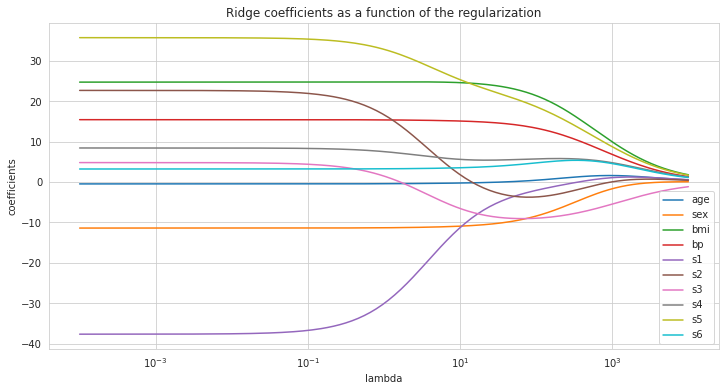

In [82]:
# Plot ridge coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
for i in range(len(diabetes.feature_names)):
    plt.plot(lambdas, ridge_coefs[:, i], label=diabetes.feature_names[i])
plt.legend()
plt.show()

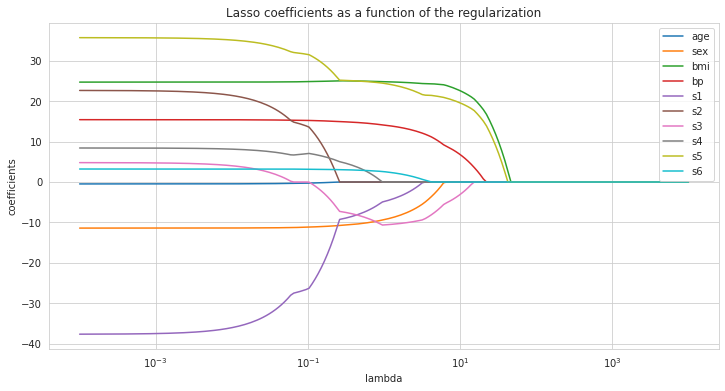

In [83]:
# Plot lasso coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
for i in range(len(diabetes.feature_names)):
    plt.plot(lambdas, lasso_coefs[:, i], label=diabetes.feature_names[i])
plt.legend()
plt.show()

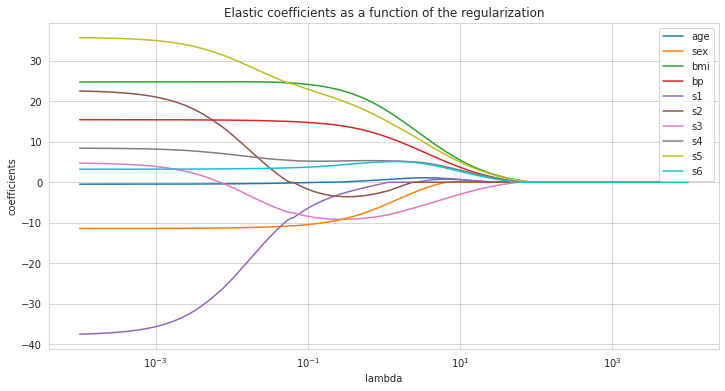

In [84]:
# Plot elastic coefficients vs. lambda
plt.figure(figsize=(12, 6))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Elastic coefficients as a function of the regularization')
for i in range(len(diabetes.feature_names)):
    plt.plot(lambdas, elastic_coefs[:, i], label=diabetes.feature_names[i])
plt.legend()
plt.show()

Ridge regression:

As lambda increases, the coefficients of the independent variables tend to decrease towards zero.Ridge regression does not set any coefficient to exactly zero, even for high values of lambda.Ridge regression can be used to reduce the effect of multicollinearity among the independent variables.


LASSO regression:

As lambda increases, the coefficients of some of the independent variables become exactly zero, leading to a sparse model.LASSO regression performs feature selection and can be used to identify the most important independent variables.The choice of the optimal value of lambda is important in LASSO regression, as it determines the number of selected features.